<a href="https://colab.research.google.com/github/TomPhanAnh/Kaggle-Solution/blob/main/Ph%C6%B0%C6%A1ng_ph%C3%A1p_%C4%91%E1%BB%8Bnh_l%C6%B0%E1%BB%A3ng_Publisher_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Tiếp tục**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data = pd.read_csv("data.csv")
data.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'], axis = 1, inplace = True)
data.dropna(subset = {"Comment Content"},axis = 0, inplace = True)
data.head()

,Page,Header,Date,Title,Type,Publisher,Like,Comment,Issue,Solve Case,CaseBelong,NumofWord,Comment Content
0,Tâm sự Affiliate - MMO,CHIA SẺ CÓ TÂM CASE STUDY KIẾM 5-10 USD/NGÀY T...,NaN,1,Teaching,Rich,2200.0,476.0,NaN,NaN,NaN,8496,Hưng Vũ\nNgười kiểm duyệt\n\nBài này nói về GA...
1,Tâm sự Affiliate - MMO,TƯ DUY SỬ DỤNG GOOGLE ADS ĐỂ CHẠY AFFILIATE - ...,NaN,1,Teaching,Rich,527.0,84.0,NaN,NaN,NaN,5518,Nguyễn Anh Tín\nTác giả\nQuản trị viên\nĐăng 3...
2,Tâm sự Affiliate - MMO,MỌI THỨ CẦN BIẾT VỀ CHẠY BẨN FACEBOOK ADS\nNhâ...,NaN,1,Teaching,Rich,514.0,85.0,NaN,NaN,NaN,5511,Thanh Ngân\nbài viết tuyệt vời\nPhản hồi1 tuần...
3,Cộng đồng Publisher & KOL Ecomobi,CÁCH ĐỂ XÂY DỰNG MỘT KÊNH TIKTOK REVIEW THÀNH ...,NaN,1,Teaching,Rich,332.0,87.0,NaN,NaN,NaN,7634,Trang Biển\nQuản trị viên\n\n3 ngày 5 trịu 😱😱?...
4,Cộng đồng Publisher & KOL Ecomobi,Kiếm Hơn 100 triệu)/1 tháng \nBằng traffic aff...,30/6/2022,1,Teaching,Rich,325.0,85.0,NaN,NaN,NaN,1857,Ecomobi Social Selling Platform\nQuản trị viên...


# **Tổng quan phương pháp**

## **Mục đích thực hiện:**

Phương pháp định tính giúp trả lời/phân tích/bổ sung dẫn chứng cho việc tìm hiểu sâu hơn về **sở thích/điều quan tâm & khó khăn/nỗi sợ của Publisher*** tại ***các nền tảng AM khác ngoài HyperLead.***

Việc nghiên cứu trên ***hỗ trợ đưa ra các giải pháp thu hút nguồn Publisher từ các trang/ nền tảng AM khác.***

Tuy nhiên, thời điểm hiện tại, bài phân tích ***chỉ đưa ra các phát hiện (Descriptive Approach)*** chứ chưa đề xuất các kề hoạch cần thực hiện (Predescriptive Approach
## **Nguồn dữ liệu:**
Nguồn dữ liệu được lấy trực tiếp từ **2 trang FanPage lớn nhất (Về lượng tương tác) tại Việt Nam liên quan đến lĩnh vực Affiliate Marketing** có tổng lượng thành viên là 81.4K.

Thời gian thu thập dữ liệu là **từ 1/6/2022 đến 7/7/2022**

Tổng số dữ liệu là **115 hàng và 21 cột**
### **Lý do chọn dữ liệu:**
Nhằm đề phòng các vấn đề trong quá trình thu thập thông tin từ Publisher thông qua bảng hỏi/phỏng vấn trực tiếp (đã bàn luận từ trước), nhóm quyết định thu thập dữ liệu từ các trang FanPage vì ***đây là nơi các Publisher bày tỏ/nêu ý kiến/vấn đề/thành tựu của mình một cách công khai và rõ ràng nhất cũng như ít sự đề phòng (so sánh với phương pháp cũ)***

Vì vậy, ***bài phân tích có khả năng cho kết quả khả quan và công bằng hơn.***
### **Link:** https://drive.google.com/file/d/1Znf5eLtP5eXbHZl4rqm-5P4MyoqWQOtn/view?usp=sharing

# **Mô tả dữ liệu:**
- **Page:** Tên trang
- **Header:** Nội dung bài viết
- **Date:** Thời gian bài viết được đăng tải
- **Title:** Bài viết có ***tiêu đề (1) hay không (0)***
- **Type:** Thể loại bài viết gồm ***Teaching- Chia sẻ kiến thức, Sharing-Chia sẻ thành tựu, Info - Thông tin chiến dịch, Asking - Hỏi đáp***
- **Like**: Số lượt quan tâm mỗi bài
- **Issue:** Vấn đề các Publisher thường gặp (Nêu lên trong bài Post)
- **SolveCase**: bài viết được ***phản hồi (1) hay không***
- **CaseBelong:** Vấn đề này thuộc về bên nào ***(Publisher, Advertiser, Network, User)***
- **Comment:** Số lượt tương tác mỗi bài
- **Comment Content**: Tổng hợp các bình luận

# **Phương pháp phân tích:**
## **Exploratory Data Analysis (EDA)**: là một phương pháp phân tích dữ liệu ***chủ yếu sử dụng các kỹ thuật về biểu đồ, hình vẽ.***

Khác với statistical graphics, EDA không chỉ tập trung vào một phương diện đặc trưng nào của dữ liệu mà trực tiếp làm dữ liệu tự khám phá ra cấu trúc của nó, đồng thời giúp chúng ta có cơ sở để chọn mô hình trong các bước tiếp theo.

Những kỹ thuật biểu đồ được sử dụng trong ***EDA thường khá đơn giản, bao gồm một vài kỹ thuật sau:***
- Vẽ dữ liệu nguyên bản sử dụng data traces, histograms, block plots, ...
- Vẽ phân bố của dữ liệu nguyên bản sử dụng mean plots, standard deviation plots, box plots, ...
- Sắp xếp các biểu đồ giúp tối đa hoá khả năng tự nhiên về nhận biết mô hình của con người.

## **TF-IDF: inverse document frequency,** 
là ***trọng số của một từ trong văn bản thu được qua thống kê thể hiện mức độ quan trọng của từ này trong một văn bản***, mà bản thân văn bản đang xét nằm trong một tập hợp các văn bản.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


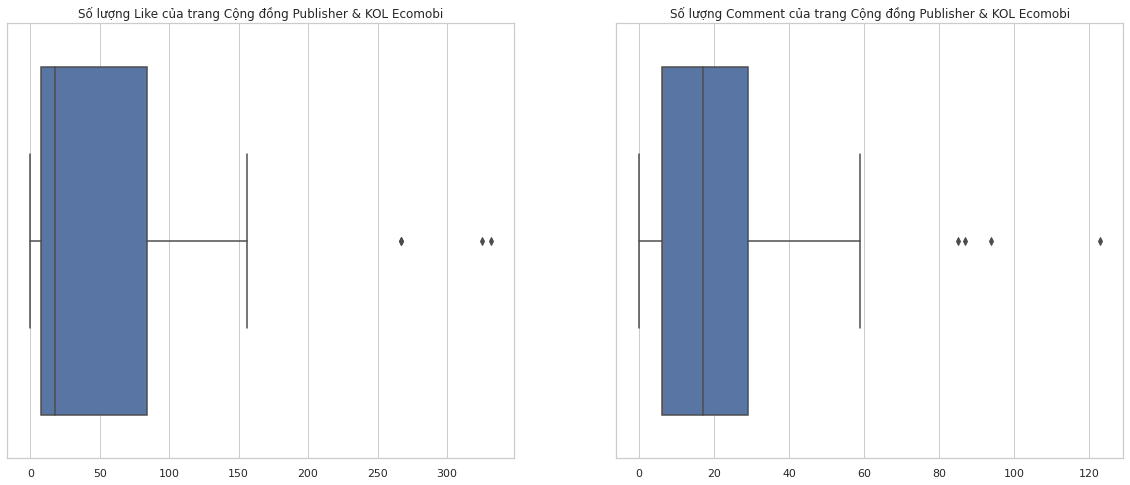

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title("Số lượng Like của trang Cộng đồng Publisher & KOL Ecomobi")
sns.boxplot(data[data["Page"] =="Cộng đồng Publisher & KOL Ecomobi"]["Like"].values)

plt.subplot(1,2,2)
plt.title("Số lượng Comment của trang Cộng đồng Publisher & KOL Ecomobi")
sns.boxplot(data[data["Page"] =="Cộng đồng Publisher & KOL Ecomobi"]["Comment"].values)


## **Nhận xét:**

Dựa trên biểu đồ boxplot, ta thấy được rằng tồn tại một số bài viết có lượt like và comment vượt trội hơn so với mức độ thông thường. 

***Các bài viết được quan tâm đặc biệt đó lần lượt là:***

In [ ]:
data_PE = data.loc[(data["Page"] == "Cộng đồng Publisher & KOL Ecomobi") &
         (data["Like"] > 150)|
         (data["Comment"] > 60)]
round(sum(data_PE["Comment"])/sum(data["Comment"].dropna())*100,2)


70.52

In [ ]:
data_PE.head()

,Page,Header,Date,Title,Type,Publisher,Like,Comment,Issue,Solve Case,CaseBelong,NumofWord,Comment Content
0,Tâm sự Affiliate - MMO,CHIA SẺ CÓ TÂM CASE STUDY KIẾM 5-10 USD/NGÀY T...,NaN,1,Teaching,Rich,2200.0,476.0,NaN,NaN,NaN,8496,Hưng Vũ\nNgười kiểm duyệt\n\nBài này nói về GA...
1,Tâm sự Affiliate - MMO,TƯ DUY SỬ DỤNG GOOGLE ADS ĐỂ CHẠY AFFILIATE - ...,NaN,1,Teaching,Rich,527.0,84.0,NaN,NaN,NaN,5518,Nguyễn Anh Tín\nTác giả\nQuản trị viên\nĐăng 3...
2,Tâm sự Affiliate - MMO,MỌI THỨ CẦN BIẾT VỀ CHẠY BẨN FACEBOOK ADS\nNhâ...,NaN,1,Teaching,Rich,514.0,85.0,NaN,NaN,NaN,5511,Thanh Ngân\nbài viết tuyệt vời\nPhản hồi1 tuần...
3,Cộng đồng Publisher & KOL Ecomobi,CÁCH ĐỂ XÂY DỰNG MỘT KÊNH TIKTOK REVIEW THÀNH ...,NaN,1,Teaching,Rich,332.0,87.0,NaN,NaN,NaN,7634,Trang Biển\nQuản trị viên\n\n3 ngày 5 trịu 😱😱?...
4,Cộng đồng Publisher & KOL Ecomobi,Kiếm Hơn 100 triệu)/1 tháng \nBằng traffic aff...,30/6/2022,1,Teaching,Rich,325.0,85.0,NaN,NaN,NaN,1857,Ecomobi Social Selling Platform\nQuản trị viên...


## **Đặc điểm:**
Những bài viết này nhận được sự quan tâm đầu tiên có đặc điểm là mang nội dung là ***Teaching-Dạy học*** bởi các ***Pulisher có nguồn doanh thu khủng hoặc có tiếng trong ngành***.
Tỷ lệ có thể đạt đến ***85%***. Trong khi đa số nội dung của Publisher trên các diễn dàn tập trung vào ***


Tỷ lệ các bài viết này chiếm khoảng ***80% tổng lượt Lịke*** và ***72.26% lượt comment***.

Text(0.5, 1.0, 'Phân phối các Publiser trên các Page')

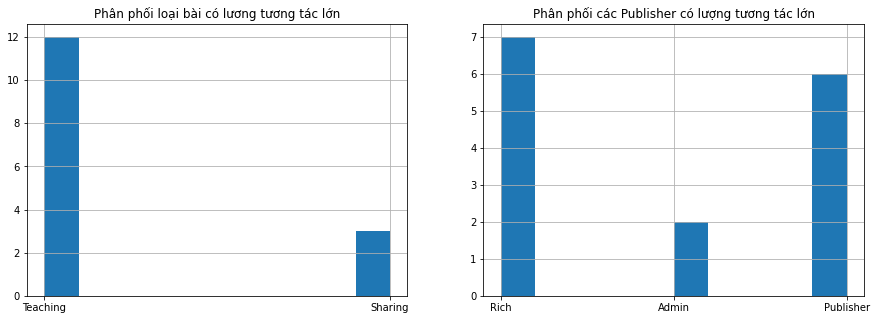

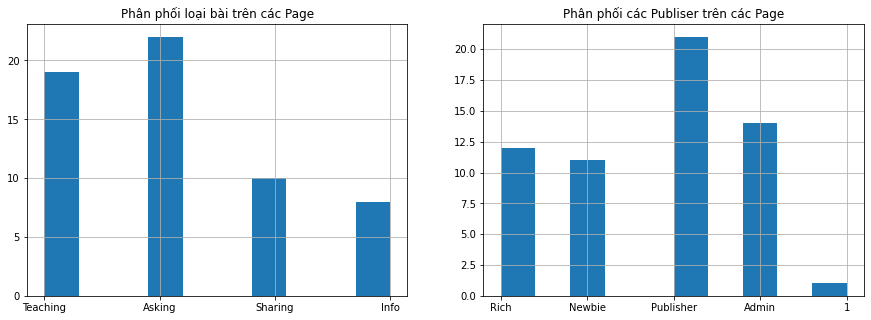

In [ ]:
plt.subplots(4,2, figsize = (15,5))

plt.subplot(1,2,1)
data_PE["Type"].hist()
plt.title("Phân phối loại bài có lương tương tác lớn")

plt.subplot(1,2,2)
data_PE["Publisher"].hist()
plt.title("Phân phối các Publisher có lượng tương tác lớn")

plt.subplots(4,2, figsize = (15,5))

plt.subplot(1,2,1)
data["Type"].hist()
plt.title("Phân phối loại bài trên các Page")

plt.subplot(1,2,2)
data["Publisher"].hist()
plt.title("Phân phối các Publiser trên các Page")



## **Kết luận:**
- Nhóm thấy rằng tại ***các bài tương tác lớn: Nội dung chủ yếu xoay quanh việc chia sẻ kiến thức với các thành viên trong nhóm***(85.76%) 
- Nhiều đối tượng cung cấp các bài viết có chất lượng ***ngoại trừ nhóm Newbie***
- Về mặt bằng chung, lượng lớn thông tin được chia sẻ ***tập trung vào phần giải đáp thắc mắc*** ***xoay quanh nhóm từ khóa*** gồm: ***Thanh toán, Network, Link Lỗi, Hoa Hồng".***
- Các câu hỏi đặt ra thường rơi vào 2 nhóm lớn là nhóm ***Newbie và Publisher***. Đối với nhóm Admin thì chủ yếu đăng ***thông tin Campaign*** và có ***lượng tương tác thấp***.

In [ ]:
data["Issue"].value_counts()

Thanh toán    3
Link          3
Thay đổi      2
Hủy đơn       1
Mất đơn       1
Bị ban        1
Hệ thống      1
1             1
Name: Issue, dtype: int64

## **Kết luận:**
Publisher thường xuyên nêu lên các vấn đề gặp phải liên quan đến thanh toán, đường link bị lỗi hoặc thậm chí ***cân nhắc chuyển đổi nền tảng AM***.

Các ***câu hỏi/chủ đề thường gặp liên quan đến thanh toán, hoa hồng, cân nhắc chuyển network và kiến thức, họ thường lựa chọn các hội nhóm*** để được giải đáp thay vì team AM/PM.

Xét tổng quan: Nếu phân loại lỗi theo hệ thống, Publisher hoặc Advertiser thì ***hệ thống chiếm tỷ lệ lớn nhất (>60%), tiếp theo là Publisher (30%) và User (10%)***

### **Trong hình trên, Nhóm miêu tả dữ liệu dựa trên 4 biến bao gồm:**
- **Publisher:** Nhóm Publisher tính theo gồm Rich (> 100 triệu VND), Publisher (>1 triệu và < 100 triệu), Newbie (< 1 triệu) và Admin 
- **Title:** Các bài viết có kèm tiêu đề
- **Like:** Số lượt quan tâm với bài post
- **Comment:** Số lượt tương tác với bài Post

<Figure size 1080x720 with 0 Axes>

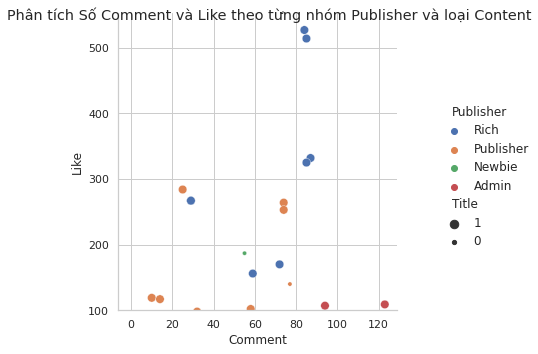

In [ ]:
plt.figure(figsize = (15,10))
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
data_x = data[data["Like"] < 600]
g = sns.relplot(
    data=data_x,
    x="Comment", y="Like",
    hue="Publisher", size="Title")

g.fig.suptitle("Phân tích Số Comment và Like theo từng nhóm Publisher và loại Content")
g.set(ylim=(100, None))
g.set(ylim=(100, None))

<Figure size 1080x720 with 0 Axes>

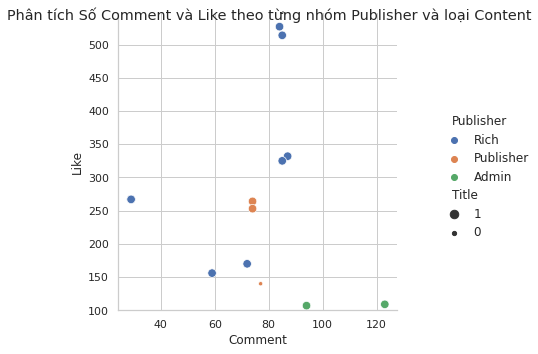

In [ ]:
plt.figure(figsize = (15,10))
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_PE[data_PE["Like"] < 700],
    x="Comment", y="Like",
    hue="Publisher", size="Title")

g.fig.suptitle("Phân tích Số Comment và Like theo từng nhóm Publisher và loại Content")
g.set(ylim=(100, None))
g.set(ylim=(100, None))

## **Qua đó, nhóm rút ra kết luận của từng nhóm lần lượt rằng:**
- Nhóm ***Rich*** thường viết bài có tiêu đề và nhận được nhiều sự quan tâm nhất kể cả chiều
- Các bài viết của ***Admin*** thường có tập trung vào cung cấp thông tin và có lượng ***tương tác ít về mặt Like nhưng nhiêu về Comment***
- ***Nhóm Publisher có tính chất đa dạng kể cả về chất lượng- Title cũng như sô lượt tương tác***
- ***Nhóm Newbie không xuất hiện trong các bài nổi bật***


### **Publisher có ý định thay đổi Network sẽ tập trung vào so sánh hoa hồng và thời gian thanh toán.**

## **Mở rộng phần nghiên cứu:**
Nhóm tiếp tục đi sâu thái độ của nhóm Publisher thông qua việc phân tích Comment của các nhóm Publisher đối với từng loại Content.

### **Phương pháp sử dụng: TF-IDF** 
Viết tắt của thuật ngữ tiếng Anh ***term frequency – inverse document frequency***,tf-idf là ***trọng số của một từ trong văn bản thu được qua thống kê thể hiện mức độ quan trọng của từ này trong một văn bản***, mà bản thân văn bản đang xét nằm trong một tập hợp các văn bản.

TF-IDF dùng để ***ước lượng mức độ quan trọng của từ đó như thế nào . Khi tính tần số xuất hiện tf thì các từ đều được coi là quan trọng như nhau.*** 

In [ ]:
import re
import functools
import operator
import emoji

uniqueword = set(data["Comment Content"][0].split(" "))
for i in data["Comment Content"]:
  i = i.replace("\n"," ")
  try:
    string = i.split(" ")
  except:
    string = i
  try:
    uniqueword = uniqueword.union(set(string))
  except:
    pass

  
numofword = dict.fromkeys(set(uniqueword),0)

In [ ]:
for i in data["Comment Content"]:
  i = i.replace("\n"," ")
  try:
    string = i.split(" ")
    for word in string:
      numofword[word] += 1
  except:
    pass

In [ ]:
wording = pd.DataFrame(numofword.items(), columns = ["word","count"])
sum_count = sum(wording["count"])
wording["count"] = wording["count"]/sum_count
wording.sort_values("count", ascending = False)

,word,count
3247,Phản,0.042788
401,tuần,0.027860
0,,0.015877
4287,ngày,0.013940
1032,Nguyễn,0.012003
...,...,...
1066,"sếp,hóng",0.000000
193,vận,0.000000
4357,part2,0.000000
4752,Bổ,0.000000


In [ ]:
uniqueword = set(data_PE["Comment Content"][0].split(" "))
for i in data_PE["Comment Content"]:
  i = i.replace("\n"," ")
  try:
    string = i.split(" ")
  except:
    string = i
  try:
    uniqueword = uniqueword.union(set(string))
  except:
    pass

  
numofword = dict.fromkeys(set(uniqueword),0)

In [ ]:
for i in data_PE["Comment Content"]:
  i = i.replace("\n"," ")
  try:
    string = i.split(" ")
    for word in string:
      numofword[word] += 1
  except:
    pass

In [ ]:
wording = pd.DataFrame(numofword.items(), columns = ["word","count"])
sum_count = sum(wording["count"])
wording["count"] = wording["count"]/sum_count
wording.sort_values("count", ascending = False)

,word,count
2693,Phản,0.045961
341,tuần,0.032983
0,,0.012763
861,Nguyễn,0.012727
3523,ngày,0.012691
...,...,...
1419,ông\nPhản,0.000000
1417,serving'\nPhản,0.000000
3786,Trí\nPhản,0.000000
1413,Hòa\n[Mình,0.000000


## **Kết luận:**
Dựa trên kết quả phân tích dữ liệu văn bản của **toàn bộ dữ liệu** và **nhóm dữ liệu có số lượng tương tác nổi bật** thường không rải rác, ***không tập trung số lượng lớn vào nhóm từ khóa nhất định***


#**Kết luận**

**Ưu điểm:**
- Phương pháp định lượng cho ***kết quả gần tương đồng*** với kết quả định tính - dẫn chứng khẳng định tính hợp lý các vấn đề mà Publisher đang gặp phải.
- Mô tả/Phân tích có ***chiều sâu lẫn chiều ngang***
- Phù hợp với điều kiện ***Publisher thiếu hợp tác***
- Phương pháp có ***nhiều khả năng khai thác thêm.***

**Nhược điểm:**
- Điểm ***dữ liệu/thu gom dữ liệu chưa tối ưu*** nên hạn chế mặt thời gian
- Lượng ***mẫ/quan sát chưa đủ nhiều***
- Nguồn Code còn sơ sài, ***chưa thực sự khai thác triệt để đặc biệt phần phản hồi của Publisher***